In [1]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('./mesa.mplstyle10')

In [2]:
dataMAD = pd.read_csv("./Output_data/concatenated_file_MAD.csv")
dataNT = pd.read_csv("./Output_data/concatenated_file_rel.csv")
datanonrel_MAD = pd.read_csv("./Output_data/concatenated_file_nonrel_MAD.csv")
datanonrel_NT = pd.read_csv("./Output_data/concatenated_file_nonrel_NT.csv")
dataMAD.head()

,Mbh,abh,AMexp,Mexp,filename,tff,Md,Mco,Rexp,MHe_form,...,MHe_dep,AMfinal_He_dep,R_He_dep,Omega_mean_He_dep,Omega_mean_exp,Mc12_dep,AM_c12_dep,R_c12_dep,Omega_c12_dep,Eacc
0,4.983,0.15150,3.256000e+49,4.984222,0/LOGS/profile72,1314.658139,5.151000e-09,2.970036,1.400817,4.999526,...,4.989663,3.300000e+49,1.453448,0.000259,0.000877,4.984223,3.256000e+49,1.453448,0.000259,4.094000e+47
1,6.964,0.12890,5.400000e+49,6.964187,1/LOGS/profile12,2998.196017,1.595000e-12,4.696979,2.713960,6.998907,...,6.975745,5.501000e+49,2.713960,0.000227,0.003195,6.964187,5.400000e+49,2.713960,0.000227,5.883000e+45
2,8.938,0.11200,7.782000e+49,8.938068,2/LOGS/profile35,750.145635,0.000000e+00,6.534862,1.206268,8.998252,...,8.955658,7.956000e+49,1.206268,0.000181,0.000785,8.938069,7.782000e+49,1.206268,0.000181,0.000000e+00
3,10.900,0.10100,1.038000e+50,10.904303,3/LOGS/profile11,444.193695,0.000000e+00,8.212380,0.882759,10.996840,...,10.917031,1.053000e+50,0.895032,0.000144,0.006528,10.904303,1.038000e+50,0.895032,0.000144,0.000000e+00
4,12.860,0.09061,1.300000e+50,12.862849,4/LOGS/profile15,384.282303,0.000000e+00,9.931898,0.847345,12.996818,...,12.898853,1.344000e+50,0.997860,0.000124,0.000364,12.866603,1.306000e+50,0.916727,0.000124,0.000000e+00


###### For spin

In [3]:
def transform_spin(x, y):
    df = pd.DataFrame()
    
    df["x"] = x
    df["y"] = y
    
    df["sqrt(xy)"] = np.sqrt(df['x'] * df['y'])
    df["sqrt(x)"] = np.sqrt(df['x'])
    df["sqrt(y)"] = np.sqrt(df['y'])

    df["sqrt(x)x"] = np.sqrt(df['x']) * df['x']
    df["sqrt(y)x"] = np.sqrt(df['y'])  * df['x']

    df["sqrt(x)y"] = np.sqrt(df['x'])  * df['y']
    df["sqrt(y)y"] = np.sqrt(df['y'])  * df['y']
    df["square(x)"] = df['x'] * df['x']
    df["square(y)"] = df['y'] * df['y']

    df["xy"] = df['x'] * df['y']
    df["xxy"] = df['x'] * df['x'] * df['y']
    df["xyy"] = df['x'] * df['y'] * df['y']
    
    features = ["sqrt(xy)", "sqrt(x)", "sqrt(y)", "xy", "x", "y"]

    return df[features]

In [4]:
def transform_MBH(x, y):
    df = pd.DataFrame()
    
    df["x"] = x
    df["y"] = y
    
    df["sqrt(xy)"] = np.sqrt(df['x'] * df['y'])
    df["sqrt(x)"] = np.sqrt(df['x'])
    df["sqrt(y)"] = np.sqrt(df['y'])

    df["sqrt(x)x"] = np.sqrt(df['x']) * df['x']
    df["sqrt(y)x"] = np.sqrt(df['y'])  * df['x']
    df["xy"] = df['x'] * df['y']
    
    features = ["sqrt(xy)", "sqrt(x)", "sqrt(y)", "x", "y"]

    return df[features]

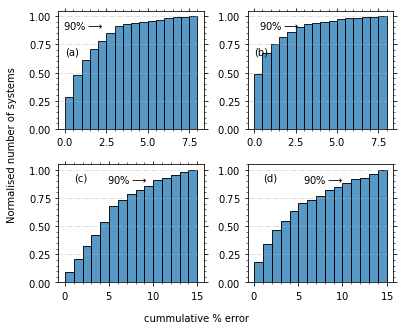

In [5]:
ax = plt.figure(figsize = (6,5.))
gs = GridSpec(2, 2, hspace = 0.3, wspace = 0.3)



# ------------------------------------- NT MBH  -------------------------------------
x = "Mexp"
y = "AMexp"
z = "Mbh"   
msun = 1.989e33
features = ["sqrt(xy)", "sqrt(x)", "sqrt(y)", "x", "y"]
result = []
intercept  = []

plt.subplot(gs[0])
mask = dataNT['abh'] <= 0.9 
df_temp = dataNT[mask].copy()
df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

df_temp["sqrt(xy)"] = np.sqrt(df_temp[x] * df_temp[y])
df_temp["sqrt(x)"] = np.sqrt(df_temp[x])
df_temp["sqrt(y)"] = np.sqrt(df_temp[y])
df_temp["x"] = df_temp[x]
df_temp["y"] = df_temp[y]

model_linear = Ridge()
model_linear.fit(df_temp[features], df_temp[z])
model_linear.predict(transform_MBH(df_temp[x], df_temp[y]))
result.append(list(zip(features,model_linear.coef_)))
intercept.append(model_linear.intercept_)

# -------------------------------------

mask = dataNT['abh'] > 0.9  
df_temp = dataNT[mask].copy()
df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

df_temp["sqrt(xy)"] = np.sqrt(df_temp[x] * df_temp[y])
df_temp["sqrt(x)"] = np.sqrt(df_temp[x])
df_temp["sqrt(y)"] = np.sqrt(df_temp[y])
df_temp["x"] = df_temp[x]
df_temp["y"] = df_temp[y]


model_linear = Ridge()
model_linear.fit(df_temp[features], df_temp[z])
prediction = model_linear.predict(transform_MBH(df_temp[x], df_temp[y]))
result.append(list(zip(features,model_linear.coef_)))
intercept.append(model_linear.intercept_)

error = prediction- df_temp[z]

ax = sns.histplot((error/df_temp[z] * 100).abs(), binrange=[0, 8], binwidth=.5, stat="probability",\
            element="bars", cumulative=True)
ax.set(xlabel="", ylabel="", title="")
plt.grid(axis='y', linestyle = '-.', alpha = 0.5)
plt.text(-0.01, .65, '(a)')
plt.text(-0.1, .875, '$90 \% \\longrightarrow$')

#--------------------------------------- MAD MBH ----------------------------------
plt.subplot(gs[1])
mask = dataMAD['abh'] >= 0.01  
df_temp = dataMAD[mask].copy()
df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

df_temp["sqrt(xy)"] = np.sqrt(df_temp[x] * df_temp[y])
df_temp["sqrt(x)"] = np.sqrt(df_temp[x])
df_temp["sqrt(y)"] = np.sqrt(df_temp[y])
df_temp["x"] = df_temp[x]
df_temp["y"] = df_temp[y]

model_linear = Ridge()
model_linear.fit(df_temp[features], df_temp[z])
prediction = model_linear.predict(transform_MBH(df_temp[x], df_temp[y]))
error = prediction- df_temp[z]

ax = sns.histplot((error/df_temp[z] * 100).abs(), binrange=[0, 8], binwidth=0.5, stat="probability",\
            element="bars", cumulative=True)
ax.set(xlabel="", ylabel="")   #                  Normalised % of system", title="")
plt.grid(axis='y', linestyle = '-.', alpha = 0.5)
result.append(list(zip(features,model_linear.coef_)))
intercept.append(model_linear.intercept_)

# -------------------------------------

mask = dataMAD['abh'] < 0.01 
df_temp = dataMAD[mask].copy()
df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

df_temp["sqrt(xy)"] = np.sqrt(df_temp[x] * df_temp[y])
df_temp["sqrt(x)"] = np.sqrt(df_temp[x])
df_temp["sqrt(y)"] = np.sqrt(df_temp[y])
df_temp["x"] = df_temp[x]
df_temp["y"] = df_temp[y]

model_linear = Ridge()
model_linear = Ridge()
model_linear.fit(df_temp[features], df_temp[z])
prediction = model_linear.predict(transform_MBH(df_temp[x], df_temp[y]))
result.append(list(zip(features,model_linear.coef_)))
intercept.append(model_linear.intercept_)

plt.text(0.0, .65, '(b)')
plt.text(0.3, .875, '$90\% \\longrightarrow$')



# --------------------------------  NT spin ----------------------------------------
x = "Mexp"
y = "AMexp"
z = "abh"
msun = 1.989e33
features = ["sqrt(xy)", "sqrt(x)", "sqrt(y)", "xy", "x", "y"]
# result = []

plt.subplot(gs[2])
mask = dataNT['abh'] <= 0.9
df_temp = dataNT[mask].copy()
df_temp[y] = (dataNT['AMexp'] / dataNT['Mexp'] / msun / 1e14).astype(float)

df_temp["sqrt(xy)"] = np.sqrt(df_temp[x] * df_temp[y])
df_temp["sqrt(x)"] = np.sqrt(df_temp[x])
df_temp["sqrt(y)"] = np.sqrt(df_temp[y])

df_temp["xy"] = df_temp[x] * df_temp[y]
df_temp["x"] = df_temp[x]
df_temp["y"] = df_temp[y]

model_linear = Ridge()
model_linear.fit(df_temp[features], df_temp[z])
prediction = model_linear.predict(transform_spin(df_temp[x], df_temp[y]))
error = prediction- df_temp[z]

ax = sns.histplot((error/df_temp[z] * 100).abs(), binrange=[0, 15], binwidth=1, stat="probability",\
            element="bars", cumulative=True)
ax.set(xlabel="", ylabel="", title="")
plt.grid(axis='y', linestyle = '-.', alpha = 0.5)
/
result.append(list(zip(features,model_linear.coef_)))
intercept.append(model_linear.intercept_)

plt.text(1, .9, '(c)')
plt.text(4.75, .875, '$90\% \\longrightarrow$')

# -------------------------------------

mask = dataNT['abh'] > 0.9
df_temp = dataNT[mask].copy()
df_temp[y] = (dataNT['AMexp'] / dataNT['Mexp'] / msun / 1e14).astype(float)

df_temp["sqrt(xy)"] = np.sqrt(df_temp[x] * df_temp[y])
df_temp["sqrt(x)"] = np.sqrt(df_temp[x])
df_temp["sqrt(y)"] = np.sqrt(df_temp[y])

df_temp["xy"] = df_temp[x] * df_temp[y]
df_temp["x"] = df_temp[x]
df_temp["y"] = df_temp[y]

model_linear = Ridge()
model_linear.fit(df_temp[features], df_temp[z])
prediction = model_linear.predict(transform_spin(df_temp[x], df_temp[y]))
result.append(list(zip(features,model_linear.coef_)))
intercept.append(model_linear.intercept_)

# ---------------------------------  MAD spin ----------------------------

plt.subplot(gs[3])
mask = dataMAD['abh'] >= 0.01
df_temp = dataMAD[mask].copy()
df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

df_temp["sqrt(xy)"] = np.sqrt(df_temp[x] * df_temp[y])
df_temp["sqrt(x)"] = np.sqrt(df_temp[x])
df_temp["sqrt(y)"] = np.sqrt(df_temp[y])
df_temp["xy"] = df_temp[x] * df_temp[y]
df_temp["x"] = df_temp[x]
df_temp["y"] = df_temp[y]

model_linear = Ridge()
model_linear.fit(df_temp[features], df_temp[z])
prediction = model_linear.predict(transform_spin(df_temp[x], df_temp[y]))

#  removing smaller values for estimating error. 
mask = prediction >= 0.01
error = prediction[mask]- df_temp[mask][z]

ax = sns.histplot((error/df_temp[mask][z] * 100), binrange=[0, 15], binwidth=1, stat="probability",\
            element="bars", cumulative=True)
ax.set(xlabel="", ylabel="")#                  Normalised % of system",\
#                                                     title="")
plt.grid(axis='y', linestyle = '-.', alpha = 0.5)
plt.text(1, .9, '(d)')
plt.text(5.5, .875, '$90\% \\longrightarrow$')
result.append(list(zip(features,model_linear.coef_)))
intercept.append(model_linear.intercept_)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
    top=False)        # ticks along the top edge are off


plt.text(-12.5, -.35, 'cummulative % error')
plt.text(-28, .55, 'Normalised number of systems', rotation = 90)
plt.savefig('./2D_hist_MBH_spinBH_error.png')

#### Fitting parameters ----- Result constains the coefficient and intercept the const factor

### NTD BH 

In [6]:
result[0]  #a <= 0.9

[('sqrt(xy)', 0.01883171744126239),
 ('sqrt(x)', -0.06513982809531865),
 ('sqrt(y)', -0.05060182744334942),
 ('x', 0.986279043985037),
 ('y', -0.0024395522546727887)]

In [7]:
intercept[0]

0.544958169883138

In [8]:
result[1]  # a >.9

[('sqrt(xy)', 0.3777450698543106),
 ('sqrt(x)', 0.41253269454514413),
 ('sqrt(y)', -3.4123767460204273),
 ('x', -0.7241958979714243),
 ('y', 0.005635070689719667)]

In [9]:
intercept[1]

80.99179963904119

### MAD BH

In [10]:
result[2]  #a >= 0.01

[('sqrt(xy)', 0.029157763904186763),
 ('sqrt(x)', -0.4240456831757791),
 ('sqrt(y)', -0.05478739682093634),
 ('x', 1.0020037272347544),
 ('y', -0.00410990499565451)]

In [11]:
intercept[2]

1.666044602779067

In [12]:
result[3]  # a < 0.01

[('sqrt(xy)', -0.014060960995777716),
 ('sqrt(x)', -0.07597461803649583),
 ('sqrt(y)', -0.07676037548191035),
 ('x', 0.8739706436780303),
 ('y', 0.0005502727727661939)]

In [13]:
intercept[3]

1.0827823129886305

### NTD spin

In [14]:
result[4]  # a <= 0.9

[('sqrt(xy)', -0.0016307185815099055),
 ('sqrt(x)', 0.04556568990654576),
 ('sqrt(y)', 0.020071822443670763),
 ('xy', -2.5917748836609525e-06),
 ('x', -0.004843355365388911),
 ('y', 0.00036819021362698493)]

In [15]:
intercept[4]

-0.12541464164880334

In [16]:
result[5]  # a> 0.9

[('sqrt(xy)', -0.002049339649465729),
 ('sqrt(x)', 0.00241650927659986),
 ('sqrt(y)', 0.05201937332134504),
 ('xy', 1.1863811589979946e-06),
 ('x', 0.003924596725434314),
 ('y', -0.00044810306169459105)]

In [17]:
intercept[5]

-0.12043953051269718

### MAD spin

In [18]:
result[6]

[('sqrt(xy)', -0.0005953713776013303),
 ('sqrt(x)', 0.11618267466376218),
 ('sqrt(y)', 0.025406212435919534),
 ('xy', 2.426862388078228e-06),
 ('x', -0.013693121625436223),
 ('y', -0.0002139723285271462)]

In [19]:
intercept[6]

-0.2760520879659027

In [192]:
### comparing the fits with actual data

# x = "Mexp"
# y = "AMexp"
# z = "abh"   # This changes
# msun = 1.989e33

# temp = result[5]
# temp1 = intercept[5]

# mask = dataNT['abh'] > 0.9  # no use
# df_temp = dataNT[mask].copy()
# df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

# MBH1 = temp[0][1]*np.sqrt(df_temp[x]*df_temp[y]) \
#     + temp[1][1]*np.sqrt(df_temp[x]) + temp[2][1]*np.sqrt(df_temp[y]) \
#     + temp[3][1]*(df_temp[x]*df_temp[y]) \
#     + temp[4][1]*(df_temp[x]) + temp[5][1]*(df_temp[y]) + temp1

# # plt.plot(df_temp[x], MBH)
# plt.scatter(df_temp[x], MBH1)



# # temp = result[6]
# # temp1 = intercept[6]
# # mask = dataMAD['abh'] < 0.01  # no use
# # df_temp = dataMAD[mask].copy()
# # df_temp[y] = (df_temp['AMexp'] / df_temp['Mexp'] / msun / 1e14).astype(float)

# # MBH1 = temp[0][1]*np.sqrt(df_temp[x]*df_temp[y]) \
# #     + temp[1][1]*np.sqrt(df_temp[x]) + temp[2][1]*np.sqrt(df_temp[y]) \
# #     + temp[3][1]*(df_temp[x]*df_temp[y]) \
# #     + temp[4][1]*(df_temp[x]) + temp[5][1]*(df_temp[y]) + temp1

# # plt.plot(df_temp[x], MBH)
# # plt.scatter(df_temp[x], MBH1)



# plt.scatter(dataNT['Mexp'], dataNT['abh'])

# # x = np.arange(2,80, 10)
# # y = x
# # plt.text(65, 72, '(a)')
# # plt.title('NT accretion flow', pad = 10)
# # plt.grid(linestyle = '-.', alpha = .3)
# # plt.plot(x, y, linestyle = '--', color = 'gray')
